## Cargamos las librerías que serán utilizadas en el análisis 

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
import seaborn as sns
%matplotlib inline

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale


# Cluster: KNN y jerárquico
# ==============================================================================
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster import hierarchy


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


### Importamos el dataset de empresas aseguradoras y las variables

In [2]:
# Importamos el dataset de empresas aseguradoras y las variables
archivo = 'C:/Users/jorge/Desktop\Cifras Sudeaseg/tres_años_2.xlsx'
df = pd.read_excel(archivo, sheet_name='Data', index_col = 0)
df.head()

,CG_Año 2022,CG_Año 2021,CG_Año 2020,GA_Año 2022,GA_Año 2021,GA_Año 2020,PC_Año 2022,PC_Año 2021,PC_Año 2020,SO_Año 2022,SO_Año 2021,SO_Año 2020,ST_Año 2022,ST_Año 2021,ST_Año 2020,SP_Año 2022,SP_Año 2021,SP_Año 2020
Empresas,,,,,,,,,,,,,,,,,,
"Altamira C.A., Seguros",4212.93725,1357.89161,1.120536e+08,11008.456612,1574.365857,1.371695e+08,75184.60886,18532.88425,1.363671e+09,122.75395,28.28269,1.027813e+06,10175.55485,2901.46031,1.316876e+08,5784.90949,1319.29203,5.446461e+07
"American International, C.A. de Seguros",176.10226,72.06893,1.119947e+07,11517.182122,3579.691949,2.307795e+08,6484.34560,3325.90869,2.638685e+08,282.01738,202.26209,2.245080e+06,1860.74169,1348.15341,1.125321e+09,774.12068,1335.80581,1.114700e+09
"Andes C.A., Seguros Los",2828.94801,1161.35930,9.596404e+07,11875.785806,2916.662551,2.506023e+08,31295.15409,9656.01537,7.104380e+08,143.34922,21.52197,2.042134e+06,11973.43652,3177.52376,2.208496e+08,5369.60311,1841.97517,1.680467e+08
Atrio Seguros C.A.,10630.14525,6480.35251,6.839143e+08,22766.009980,6605.096020,7.160971e+08,55208.35152,29826.58393,2.846067e+09,69.12001,62.44269,2.300736e+06,46662.92080,27162.95717,1.532921e+09,18266.13218,10875.73855,8.394456e+08
"Ávila C.A., de Seguros",0.00000,662.18838,1.758217e+07,0.000000,1275.477051,9.634455e+07,0.00000,3378.05383,1.579943e+08,0.00000,29.19173,2.532755e+05,0.00000,326.07969,9.462951e+05,0.00000,306.11107,8.213814e+05


La información presentada corresponde a los años 2020, 2021 y 2022 con la siguiente descripción: 
-	CG: Comisión y gastos
-	GA: Gastos administrativos
-	PC: Primas cobradas
-	SO: Saldo de operaciones
-	ST: Siniestros totales
-	SP: Siniestros pagados


Esta información fue tomada de la que publica el órgano rector (SUDEASEG) de manera regular en su página web.


https://www.sudeaseg.gob.ve/cifras-anuales/

Importante resaltar que para el año 2022 el órgano rector presenta información correspondiente a 50 empresas aseguradoras, en este estudio se omite la información correspondiente a las siguientes empresas:

-	Ávila C.A., de Seguros
-	Guayana C.A., Seguros
-	Adriática de Seguros, C.A
-	Carabobo, C.A. de Seguros
-	Regional, C.A. de Seguros
-	Vértice, C.A Seguros
-	Capital, C.A Seguros

La razón de presentarla en el estudio se debe a presentar información con valor cero en años sucesivos, lo cual no  permite hacer uso de ella en los modelos de machine learning que se utilizaran, que dando solo 43 empresas aseguradoras. 



In [3]:
df.shape

(43, 18)

Información estadística de los datos, presentando la siguiente información número de muestras, el valor medio, la desviación estándar, el valor mínimo, máximo, la mediana y los valores correspondientes a los percentiles 25% y 75%.

In [4]:
df.describe()

,CG_Año 2022,CG_Año 2021,CG_Año 2020,GA_Año 2022,GA_Año 2021,GA_Año 2020,PC_Año 2022,PC_Año 2021,PC_Año 2020,SO_Año 2022,SO_Año 2021,SO_Año 2020,ST_Año 2022,ST_Año 2021,ST_Año 2020,SP_Año 2022,SP_Año 2021,SP_Año 2020
count,43.000000,43.000000,4.300000e+01,43.000000,43.000000,4.300000e+01,4.300000e+01,43.000000,4.300000e+01,43.000000,43.000000,4.300000e+01,4.300000e+01,43.000000,4.300000e+01,43.000000,43.000000,4.300000e+01
mean,17571.448277,5434.876330,4.736865e+08,25133.231369,8789.140518,8.415795e+08,1.185926e+05,40267.786404,3.229060e+09,4941.329551,2496.449624,5.549927e+08,1.136518e+05,39708.660106,4.070067e+09,55608.675638,22372.992458,1.259227e+09
std,43680.115485,12883.151398,1.103310e+09,41361.638604,15581.349800,1.649983e+09,2.796851e+05,93307.372900,7.620217e+09,11269.568996,9095.568569,1.765491e+09,3.117159e+05,108366.127492,1.270728e+10,166069.809633,66824.996880,3.554751e+09
min,0.000000,0.000000,0.000000e+00,0.000000,11.652449,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-1375.766220,-4603.216190,-1.584016e+08,-1.194500e+00,-57.635990,-1.047767e+06,0.000000,0.000000,0.000000e+00
25%,111.589460,52.108540,4.413416e+06,2949.151842,967.577750,6.133187e+07,4.686582e+03,2237.960600,6.766438e+07,94.601750,31.522180,2.272908e+06,2.228683e+02,61.210930,7.646938e+05,199.027870,45.432295,6.698430e+05
50%,1837.693460,607.662270,4.121694e+07,9464.326112,2659.263163,1.832346e+08,1.452778e+04,4147.638310,3.736267e+08,464.860410,102.552930,2.546763e+07,4.501872e+03,2137.248050,1.488102e+08,2985.574090,1233.936720,5.703193e+07
75%,14631.994200,5214.531360,2.765407e+08,22467.201112,7563.542357,5.932115e+08,9.740631e+04,31411.285200,2.206043e+09,3606.804945,385.243275,1.022628e+08,6.442079e+04,21464.781025,1.500963e+09,24394.421765,8183.342130,5.271000e+08
max,234589.201990,59952.259540,5.135375e+09,212268.058357,62144.821276,6.887793e+09,1.513340e+06,478587.775120,4.154135e+10,48555.387700,50066.719590,9.394704e+09,1.411229e+06,506115.553320,7.892011e+10,914021.157650,384639.559270,1.832035e+10


Gráfico de distribución correspondiente a cada variable numérica presente en el DaraFrame

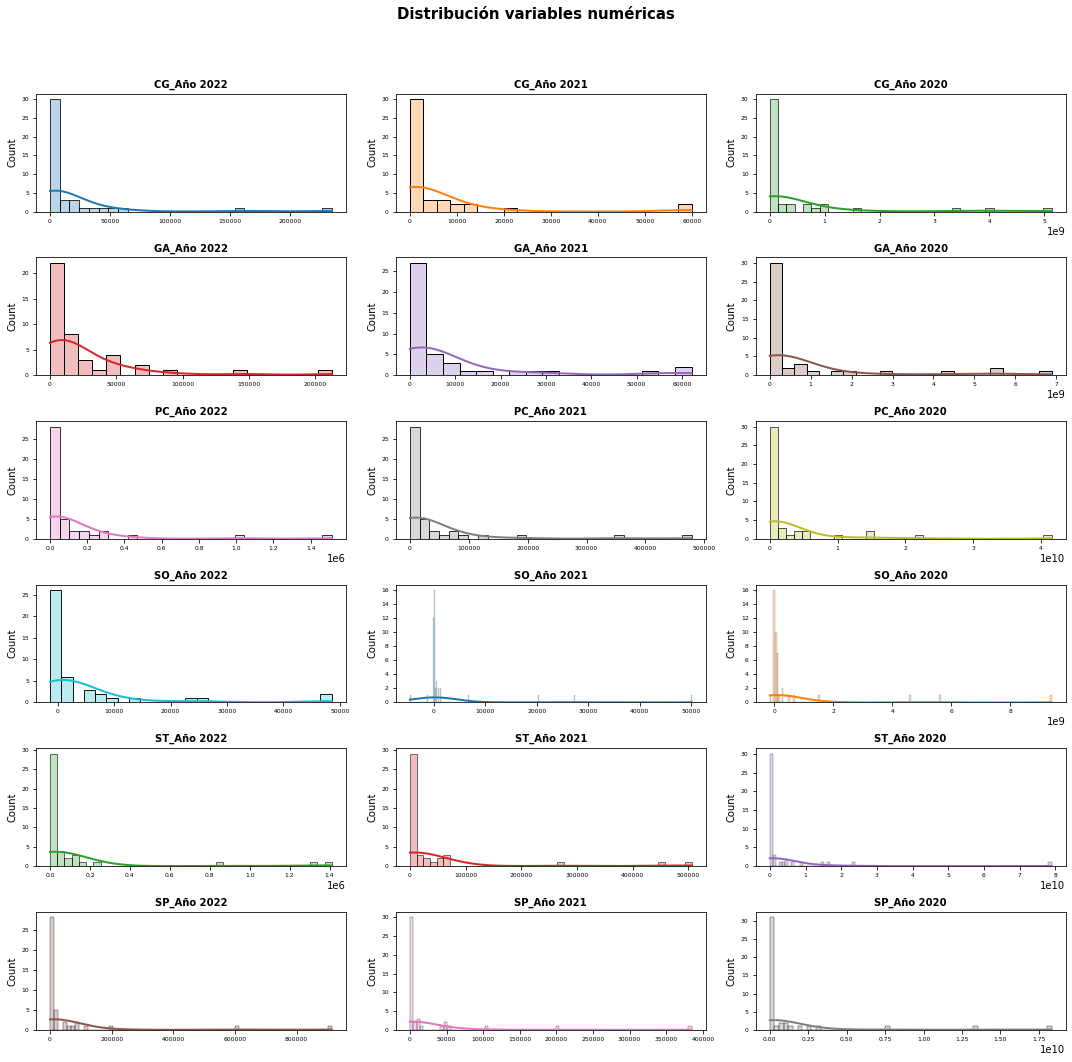

In [5]:
# Gráfico de distribución para cada variable numérica
# https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 15))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns


for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 15, fontweight = "bold");

Podemos observar que todas las variables presentan un sesgo bien pronunciado hacia valores inferiores de cada una de ellas, observándose en valores atípicos, que pudiesen afectar los resultados del modelo del cual se haga uso.

##  Normalización
Ahora podemos normalizar el set. MinMaxScaler transforma poniendo en escala a un rango. Por omisión es (0, 1). Es decir, las escalas dee estimación se traducen cada una individualmente de forma tal de quedar entre cero y uno.

In [6]:
x = df.values #returns a numpy array
min_max_scaler = MinMaxScaler()
df_mtx = min_max_scaler.fit_transform(x)
# Convertimos el array en un dataset escalado o normalizado
df_scaled = pd.DataFrame(data=df_mtx,  index = df.index, columns = df.columns)
df_scaled.head()

,CG_Año 2022,CG_Año 2021,CG_Año 2020,GA_Año 2022,GA_Año 2021,GA_Año 2020,PC_Año 2022,PC_Año 2021,PC_Año 2020,SO_Año 2022,SO_Año 2021,SO_Año 2020,ST_Año 2022,ST_Año 2021,ST_Año 2020,SP_Año 2022,SP_Año 2021,SP_Año 2020
Empresas,,,,,,,,,,,,,,,,,,
"Altamira C.A., Seguros",0.017959,0.022650,0.021820,0.051861,0.025151,0.019915,0.049681,0.038724,0.032827,0.030012,0.084717,0.016689,7.211261e-03,0.005846,0.001682,0.006329,0.003430,0.002973
"American International, C.A. de Seguros",0.000751,0.001202,0.002181,0.054258,0.057426,0.033506,0.004285,0.006949,0.006352,0.033201,0.087900,0.016816,1.319371e-03,0.002777,0.014272,0.000847,0.003473,0.060845
"Andes C.A., Seguros Los",0.012059,0.019371,0.018687,0.055947,0.046755,0.036384,0.020680,0.020176,0.017102,0.030424,0.084594,0.016795,8.485242e-03,0.006391,0.002812,0.005875,0.004789,0.009173
Atrio Seguros C.A.,0.045314,0.108092,0.133177,0.107251,0.106118,0.103966,0.036481,0.062322,0.068512,0.028938,0.085342,0.016822,3.306627e-02,0.053777,0.019437,0.019984,0.028275,0.045820
"Ávila C.A., de Seguros",0.000000,0.011045,0.003424,0.000000,0.020341,0.013988,0.000000,0.007058,0.003803,0.027553,0.084734,0.016608,8.464246e-07,0.000758,0.000025,0.000000,0.000796,0.000045


### Matriz de Correlación 

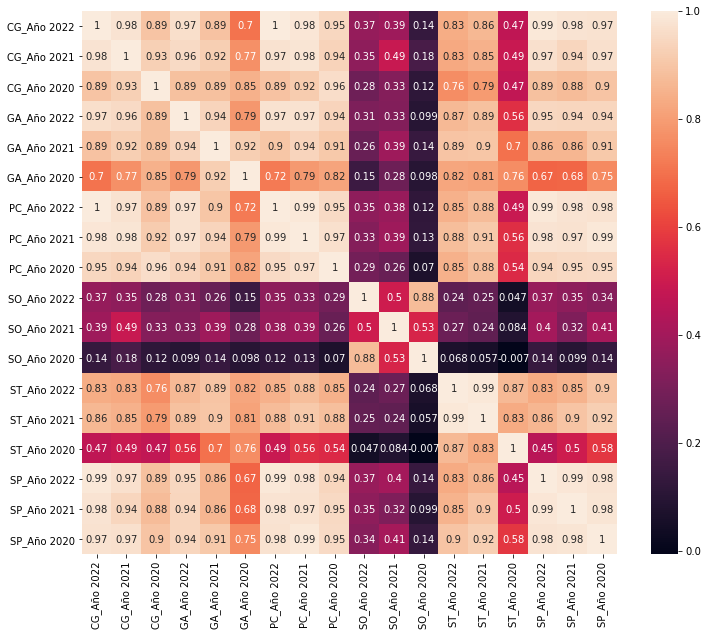

In [7]:
corr_df = df_scaled.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True)
plt.show()

# Análisis de componentes principales

Podemos observar que las variables presentan alta correlación, probablemente estén midiendo lo mismo, cuando esto sucede se recomienda hacer uso del análisis de componentes principales, PCA por sus siglas en inglés, esta técnica ayuda a eliminar la redundancia presente en los datos, de igual manera reduce el número de variables a considerar en el estudio, por ello se procederá a realizar un PCA con los datos escalados.


Hay que mencionar que el análisis de componentes principales es una técnica estadística que se utiliza para reducir la dimensionalidad de los datos, permitiendo identificar las variables que contribuyen en mayor medida en la variabilidad en los datos y elimina las menos importantes.  


### Modelo PCA


La clase sklearn.decomposition.PCA incorpora las principales funcionalidades que se necesitan a la hora de trabajar con modelos PCA. El argumento n_components determina el número de componentes calculados. Si se indica None, se calculan todas las posibles (min(filas, columnas) - 1).

Por defecto, PCA() centra los valores pero no los escala. Esto es importante ya que, si las variables tienen distinta dispersión, como en este caso, es necesario escalarlas. Una forma de hacerlo es combinar un StandardScaler() y un PCA() dentro de un pipeline. Para más información sobre el uso de pipelines consultar Pipeline y ColumnTransformer.

In [8]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

### Interpretación


Una vez entrenado el objeto PCA, pude accederse a toda la información de las componentes creadas.

components_ contiene el valor de los loadings  ϕ
  que definen cada componente (eigenvector). Las filas se corresponden con las componentes principals (ordenadas de mayor a menor varianza explicada). Las filas se corresponden con las variables de entrada

In [9]:
# Se convierte el array a dataframe para añadir nombres a los ejes. 
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18']
)

,CG_Año 2022,CG_Año 2021,CG_Año 2020,GA_Año 2022,GA_Año 2021,GA_Año 2020,PC_Año 2022,PC_Año 2021,PC_Año 2020,SO_Año 2022,SO_Año 2021,SO_Año 2020,ST_Año 2022,ST_Año 2021,ST_Año 2020,SP_Año 2022,SP_Año 2021,SP_Año 2020
PC1,0.264778,0.265931,0.252127,0.264935,0.261042,0.227429,0.266130,0.270589,0.263762,0.097802,0.109313,0.044887,0.250628,0.255760,0.173143,0.262845,0.262518,0.268691
PC2,0.028333,0.051413,-0.017749,-0.029917,-0.046408,-0.114392,0.011637,-0.006120,-0.056317,0.576471,0.435803,0.613460,-0.116656,-0.117988,-0.221713,0.038237,-0.005701,0.001725
PC3,-0.200804,-0.138222,-0.117912,-0.087892,0.135493,0.327812,-0.183108,-0.103142,-0.112189,0.122456,0.036692,0.279207,0.280344,0.217030,0.653843,-0.220767,-0.182141,-0.083393
PC4,-0.054586,0.131567,0.069770,-0.043592,0.154178,0.214316,-0.056518,0.003820,-0.096627,-0.411408,0.795677,-0.190783,-0.072507,-0.129180,-0.029946,-0.057030,-0.160738,-0.002477
PC5,-0.083444,0.031304,0.474517,0.029901,0.196880,0.541983,-0.086365,-0.017443,0.215117,-0.003070,-0.289659,0.192880,-0.281444,-0.244204,-0.213684,-0.152968,-0.171460,-0.145021
PC6,0.167336,0.113478,-0.448996,0.515086,0.431273,0.009326,0.177272,0.083765,-0.333835,-0.125675,-0.151590,0.157941,-0.058049,-0.145435,-0.077218,-0.064728,-0.165151,-0.174847
PC7,0.015061,-0.217827,-0.026668,0.265468,0.056345,0.142051,0.053710,-0.058726,0.078143,0.602236,0.156572,-0.613422,-0.040142,-0.026593,0.011191,-0.098566,-0.052721,-0.258686
PC8,-0.204479,-0.353444,-0.432031,-0.271384,0.346172,0.174629,0.003606,0.302454,0.229243,0.006123,0.021955,-0.006116,-0.219518,0.115558,-0.198801,-0.138370,0.287533,0.274134
PC9,0.350250,0.206308,-0.204774,-0.570539,-0.045946,0.236623,0.282304,0.167664,-0.084957,0.162026,-0.113261,-0.136040,0.145214,-0.188446,-0.024144,0.077281,-0.409088,0.078065
PC10,-0.015685,-0.393410,-0.158608,0.195251,-0.337748,0.065788,0.322997,0.105916,0.500049,-0.223242,0.112859,0.198445,0.253220,-0.096496,-0.056138,0.080804,-0.243187,-0.231301


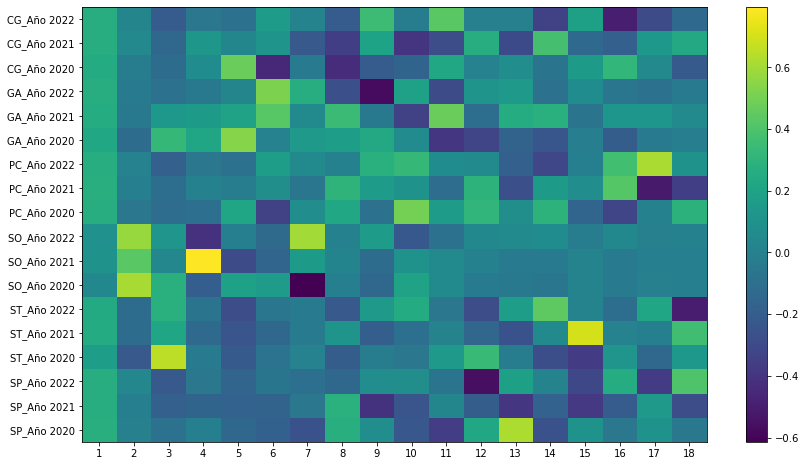

In [10]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df.columns)), df.columns)
plt.xticks(range(len(df.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Una vez calculadas las componentes principales, se puede conocer la varianza explicada por cada una de ellas, la proporción respecto al total y la proporción de varianza acumulada. Esta información está almacenada en los atributos explained_variance_ y explained_variance_ratio_ del modelo.

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[7.45717554e-01 1.20409451e-01 6.08043966e-02 3.38054732e-02
 2.39265247e-02 6.62837246e-03 4.42052715e-03 1.57295006e-03
 8.99681216e-04 7.76092379e-04 3.84295281e-04 3.24603029e-04
 1.42287889e-04 8.78238405e-05 4.81756116e-05 4.25155528e-05
 7.79295983e-06 1.48222673e-06]


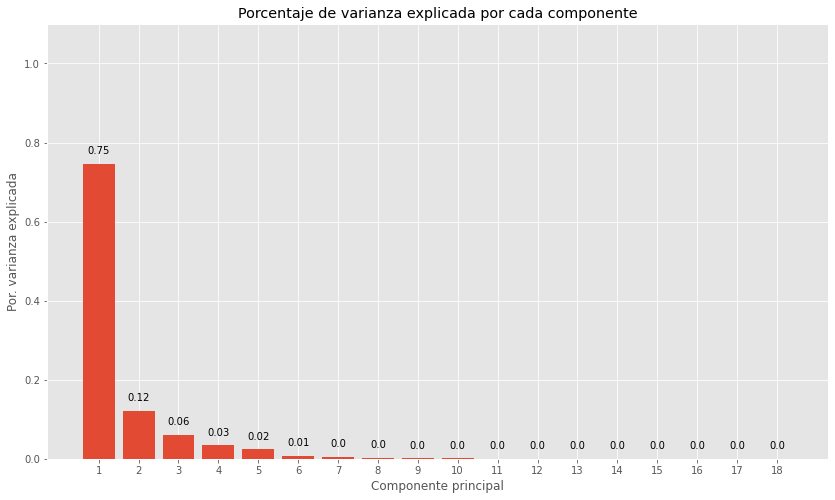

In [11]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
style.use('ggplot') or plt.style.use('ggplot')
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_ 
)

for x, y in zip(np.arange(len(df.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

En este caso, la primera componente explica el 75% de la varianza observada en los datos y la segunda el 12%. Las dos últimas componentes no superan por separado el 1% de varianza explicada.

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.74571755 0.86612701 0.9269314  0.96073688 0.9846634  0.99129177
 0.9957123  0.99728525 0.99818493 0.99896102 0.99934532 0.99966992
 0.99981221 0.99990003 0.99994821 0.99999072 0.99999852 1.        ]


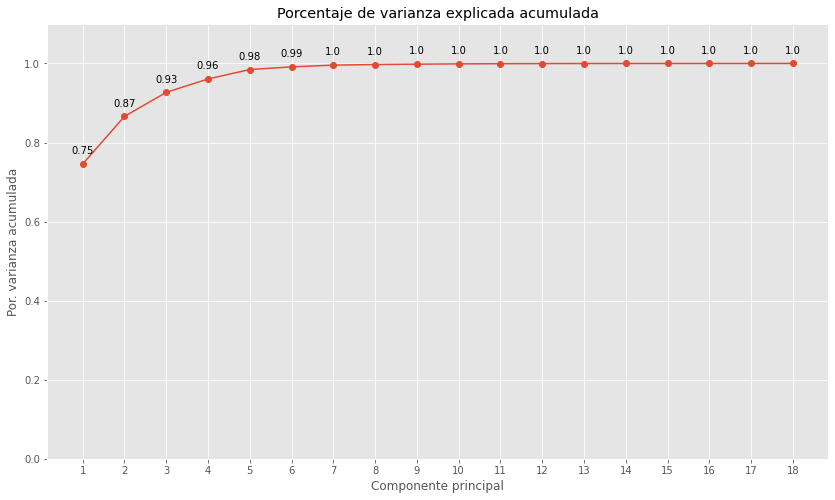

In [12]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
ax.plot(
    np.arange(len(df.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Si se empleasen únicamente las tres primeras componentes se conseguiría explicar el 93% de la varianza observada.

### Trasformación

Una vez entrenado el modelo, con el método transform() se puede reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes.

In [13]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=df)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'],
    index   = df.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Empresas,,,,,,,,,,,,,,,,,,
"Altamira C.A., Seguros",-1.302272,-0.349231,-0.320175,0.001417,-0.097959,-0.016368,-0.073738,-0.006791,0.055048,0.146859,0.000507,0.083636,-0.073383,-0.006964,0.011276,0.070452,0.038799,0.001696
"American International, C.A. de Seguros",-1.396246,-0.358297,-0.137061,0.057946,-0.137579,-0.005847,-0.108467,0.131515,-0.046475,-0.088898,-0.113454,0.038324,0.232988,-0.090042,-0.001572,-0.019299,0.019055,-0.003601
"Andes C.A., Seguros Los",-1.351997,-0.361233,-0.224761,0.040870,-0.059662,0.016972,-0.067808,0.007673,-0.010003,0.021039,-0.029958,-0.007113,0.008782,0.005351,0.006834,0.004054,0.009199,-0.005336
Atrio Seguros C.A.,-0.490720,-0.474183,-0.260293,0.117798,0.280585,-0.073402,-0.108826,-0.156643,-0.094345,-0.116905,-0.047718,0.125354,-0.030022,0.096955,0.107221,-0.013301,0.000629,-0.003992
"Ávila C.A., de Seguros",-1.640389,-0.333460,-0.196167,0.042133,-0.138613,-0.140852,-0.150872,0.047273,0.085820,-0.048023,0.013690,-0.040614,-0.034555,0.037279,-0.015968,-0.004414,-0.003418,0.005327


La transformación es el resultado de multiplicar los vectores que definen cada componente con el valor de las variables. Puede calcularse de forma manual:

In [14]:
proyecciones = np.dot(modelo_pca.components_, scale(df).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'])
proyecciones = proyecciones.transpose().set_index(df.index)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Empresas,,,,,,,,,,,,,,,,,,
"Altamira C.A., Seguros",-1.302272,-0.349231,-0.320175,0.001417,-0.097959,-0.016368,-0.073738,-0.006791,0.055048,0.146859,0.000507,0.083636,-0.073383,-0.006964,0.011276,0.070452,0.038799,0.001696
"American International, C.A. de Seguros",-1.396246,-0.358297,-0.137061,0.057946,-0.137579,-0.005847,-0.108467,0.131515,-0.046475,-0.088898,-0.113454,0.038324,0.232988,-0.090042,-0.001572,-0.019299,0.019055,-0.003601
"Andes C.A., Seguros Los",-1.351997,-0.361233,-0.224761,0.040870,-0.059662,0.016972,-0.067808,0.007673,-0.010003,0.021039,-0.029958,-0.007113,0.008782,0.005351,0.006834,0.004054,0.009199,-0.005336
Atrio Seguros C.A.,-0.490720,-0.474183,-0.260293,0.117798,0.280585,-0.073402,-0.108826,-0.156643,-0.094345,-0.116905,-0.047718,0.125354,-0.030022,0.096955,0.107221,-0.013301,0.000629,-0.003992
"Ávila C.A., de Seguros",-1.640389,-0.333460,-0.196167,0.042133,-0.138613,-0.140852,-0.150872,0.047273,0.085820,-0.048023,0.013690,-0.040614,-0.034555,0.037279,-0.015968,-0.004414,-0.003418,0.005327


Una vez realizado el PCA, debemos decidir cuantas componentes serán seleccionadas y ver la representación de los individuos en ese espacio, en este caso, la grafica que refleja la varianza explicada acumulada indica que debemos seleccionas las primeras tres componentes, con esta selección obtenemos el 93% de la varianza total.

Para la representación grafica de las componentes tomaremos la primearas dos y las primeras tres componentes y observaremos como se distribuyen las aseguradoras en estos dos nuevos espacios.


In [15]:
# Dataset con las primeras dos componentes
data_2_componentes = proyecciones.iloc[:,0:2]
data_2_componentes.head()

,PC1,PC2
Empresas,,
"Altamira C.A., Seguros",-1.302272,-0.349231
"American International, C.A. de Seguros",-1.396246,-0.358297
"Andes C.A., Seguros Los",-1.351997,-0.361233
Atrio Seguros C.A.,-0.490720,-0.474183
"Ávila C.A., de Seguros",-1.640389,-0.333460


In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(data_2_componentes)

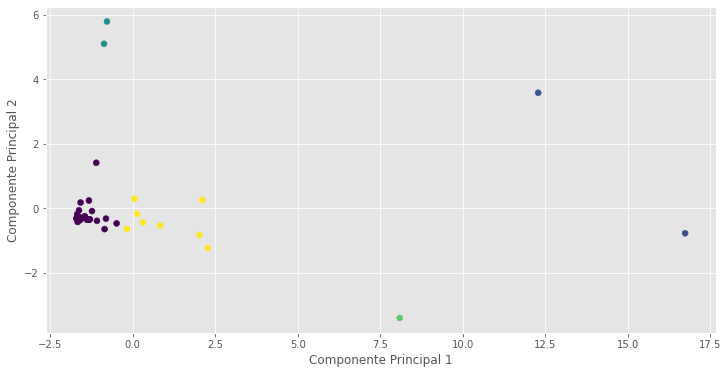

In [17]:
plt.figure(figsize=(12,6))
plt.scatter(data_2_componentes.iloc[:, 0], data_2_componentes.iloc[:, 1], c=labels)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [18]:
# Dataset con las primeras tres componentes
data_3_componentes = proyecciones.iloc[:,0:3]
data_3_componentes.head()

,PC1,PC2,PC3
Empresas,,,
"Altamira C.A., Seguros",-1.302272,-0.349231,-0.320175
"American International, C.A. de Seguros",-1.396246,-0.358297,-0.137061
"Andes C.A., Seguros Los",-1.351997,-0.361233,-0.224761
Atrio Seguros C.A.,-0.490720,-0.474183,-0.260293
"Ávila C.A., de Seguros",-1.640389,-0.333460,-0.196167


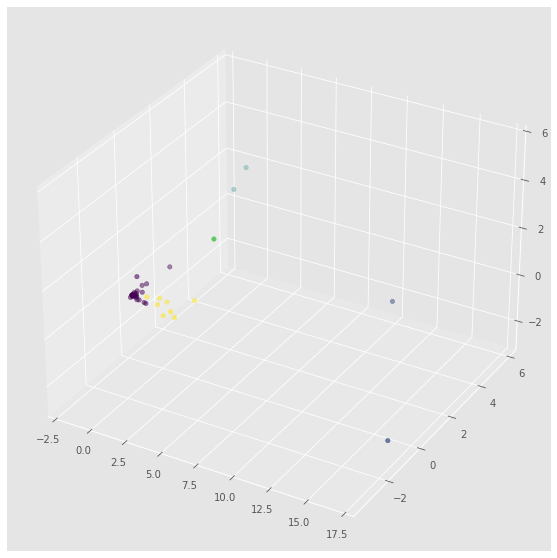

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3_componentes.iloc[:, 0], data_3_componentes.iloc[:, 1], data_3_componentes.iloc[:, 2], c=labels)
plt.show()

# K-MEANS

http://exponentis.es/ejemplo-de-clustering-con-k-means-en-python

### Seleccionamos las primeras tres componentes para aplicar KMeans

El primer paso antes de aplicar k-means es decidir qué valor de k (número de clústeres) queremos usar. Una forma de elegir este valor k es por criterio propio: si conocemos bien la distribución de nuestros datos y queremos “forzar” un número determinado de clústeres simplemente lo elegimos.

La otra opción es realizar una gráfica elbow o de codo para determinar el número óptimo de clústeres. Hacemos una iteración de k-means variando el valor de k, de forma que representamos en el eje x dicho valor de k y en el eje y la suma de los errores cuadráticos (SSE). De esta forma podemos elegir el valor de k dónde se produce el “codo” de la curva:

**NOTA:** para el modelo de K-Means usaremos las tres primeras componentes principales, que como se dijo anteriormente, contiene el 93% de la variabilidad explicada de los datos originales.

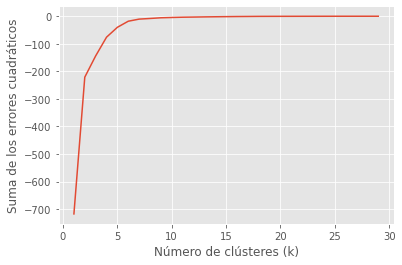

In [20]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(data_3_componentes).score(data_3_componentes) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

La curva elbow nos muestra que un valor de k = 5 puede ser apropiado, aunque se podría probar con valores entre 5 y 10 y comparar resultados. No hay una solución, un valor de k, más correcto que otro, ya que el objetivo de una clusterización con k-means es obtener información útil nuestros datos, por lo que nuestra interpretación a posteriori de los clústeres creados marcará la calidad de nuestra solución escogida.

Así que ya podemos aplicar el algoritmo de k-means:

In [21]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(data_3_componentes)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.94395795 -0.41729301 -0.14175993]
 [14.51688461  1.39948666 -1.53646624]
 [ 8.09323694 -3.41114489  5.62213291]
 [-1.43415352 -0.23149647 -0.15313636]
 [-0.82703207  5.44770484  1.58948483]]


### Etiquetado de datos.
Ya hemos ejecutado k-means y obtenido los centroides. Ahora podemos asignar cada registro de nuestro dataset a uno de los clústers:

In [22]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(data_3_componentes)
data_3_kMeans = data_3_componentes
data_3_kMeans['label'] = labels

Hemos añadido la columna “label” a nuestro dataframe original sin normalizar, por lo que ahora, cada registro está asignado a un único clúster. Le añadimos también la columna “Date” que extrajimos al inicio para saber a qué fecha corresponde cada registro:

In [23]:
data_3_kMeans.head()

,PC1,PC2,PC3,label
Empresas,,,,
"Altamira C.A., Seguros",-1.302272,-0.349231,-0.320175,3
"American International, C.A. de Seguros",-1.396246,-0.358297,-0.137061,3
"Andes C.A., Seguros Los",-1.351997,-0.361233,-0.224761,3
Atrio Seguros C.A.,-0.490720,-0.474183,-0.260293,3
"Ávila C.A., de Seguros",-1.640389,-0.333460,-0.196167,3


### Representación gráfica de los clústeres k-means.
Una vez con los datos etiquetados, podemos visualizar gráficamente en dos dimensiones el clustering realizado por k-means, ya que hemos usado sólo dos variables.

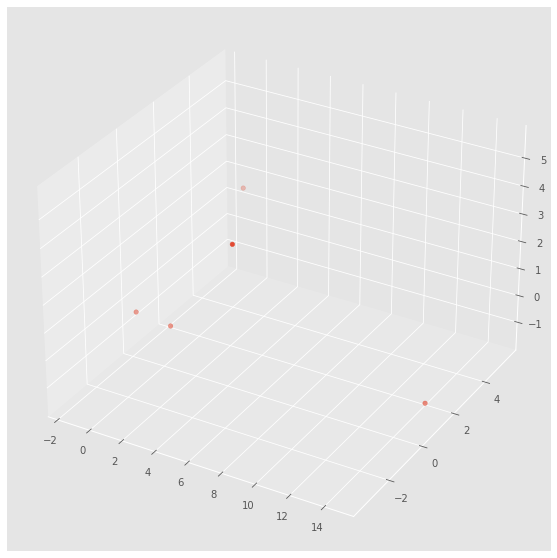

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2])
plt.show()

## Número de clúster: dos componentes principales

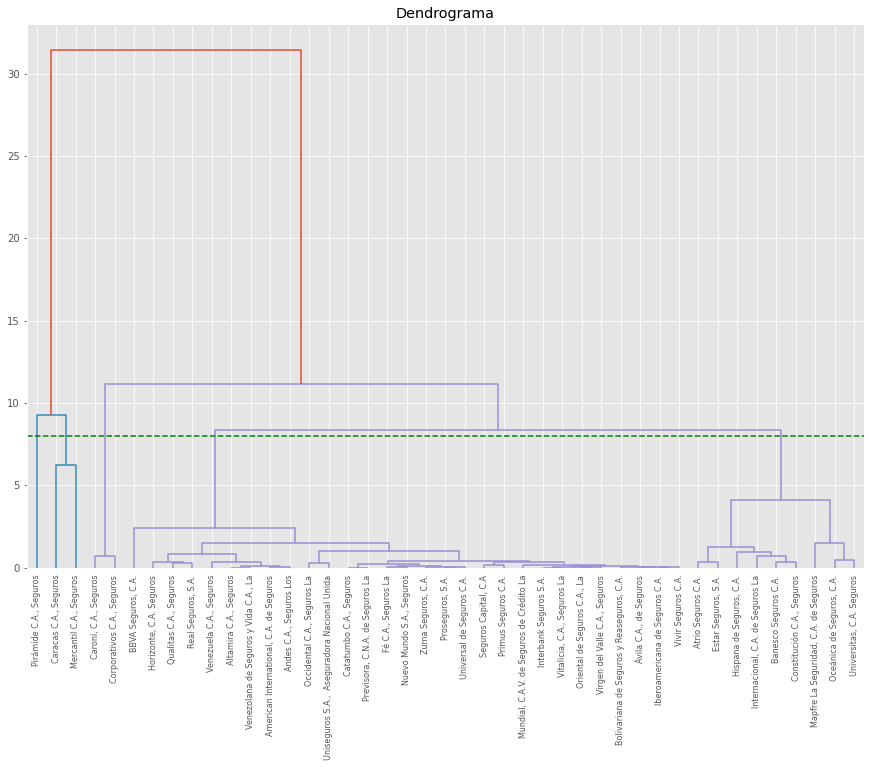

In [25]:
plt.figure(figsize=(15,10))
plt.title("Dendrograma")
z = sch.linkage(data_2_componentes, method = "ward")
dend = sch.dendrogram(z, labels = df.index.tolist())
plt.axhline(y=8,color="g", linestyle ="--")
plt.show()

In [26]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")

In [27]:
num_cluster=cluster.fit_predict(data_2_componentes)
num_cluster

array([4, 4, 4, 1, 4, 1, 4, 4, 4, 0, 2, 4, 1, 2, 1, 4, 1, 4, 4, 4, 1, 1,
       0, 4, 4, 4, 1, 4, 3, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4],
      dtype=int64)

In [28]:
data_2_cluster = data_2_componentes
data_2_cluster["cluster"]=num_cluster
data_2_cluster.head()

,PC1,PC2,cluster
Empresas,,,
"Altamira C.A., Seguros",-1.302272,-0.349231,4
"American International, C.A. de Seguros",-1.396246,-0.358297,4
"Andes C.A., Seguros Los",-1.351997,-0.361233,4
Atrio Seguros C.A.,-0.490720,-0.474183,1
"Ávila C.A., de Seguros",-1.640389,-0.333460,4


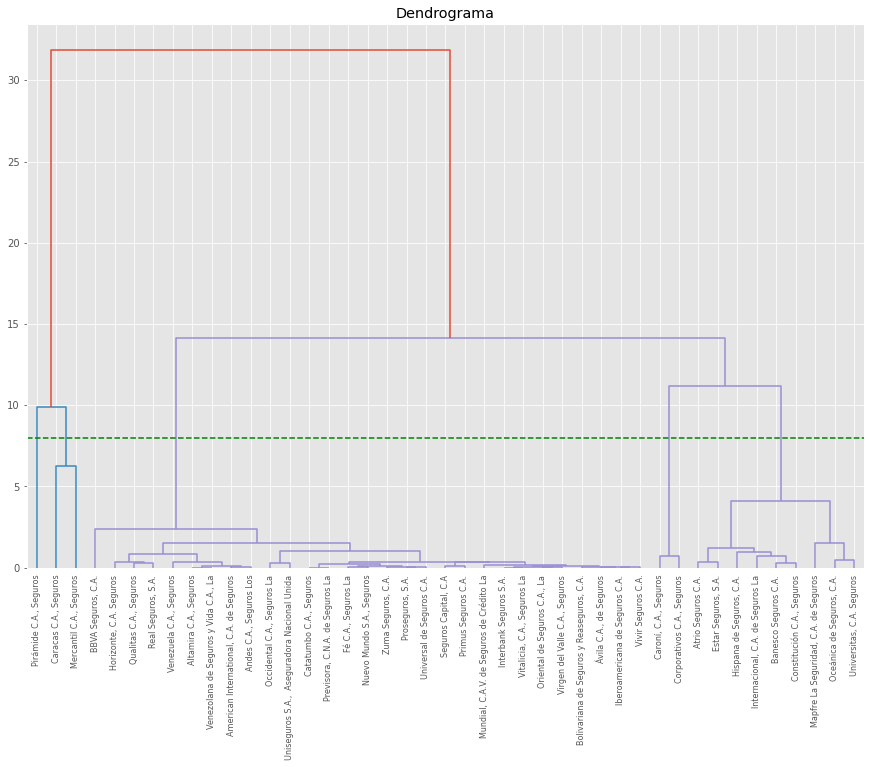

In [29]:
plt.figure(figsize=(15,10))
plt.title("Dendrograma")
z = sch.linkage(data_2_cluster, method = "ward")
dend = sch.dendrogram(z, labels = df.index.tolist())
plt.axhline(y=8,color="g", linestyle ="--")
plt.show()

### Número de clúster: tres componentes principales

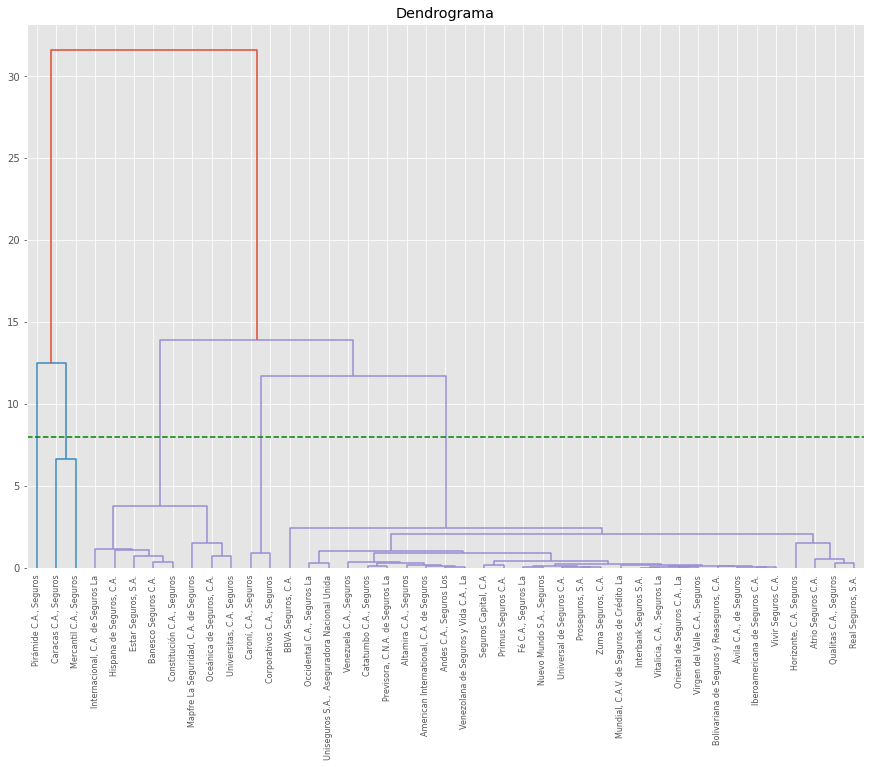

In [30]:
plt.figure(figsize=(15,10))
plt.title("Dendrograma")
z = sch.linkage(data_3_componentes, method = "ward")
dend = sch.dendrogram(z, labels = df.index.tolist())
plt.axhline(y=8,color="g", linestyle ="--")
plt.show()

In [31]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")

In [32]:
num_cluster=cluster.fit_predict(data_3_componentes)
num_cluster

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 4, 1, 2, 4, 2, 1, 2, 1, 1, 1, 2, 2,
       0, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [33]:
data_3_cluster = data_3_componentes
data_3_cluster["cluster"]=num_cluster
data_3_cluster.head()

,PC1,PC2,PC3,label,cluster
Empresas,,,,,
"Altamira C.A., Seguros",-1.302272,-0.349231,-0.320175,3,1
"American International, C.A. de Seguros",-1.396246,-0.358297,-0.137061,3,1
"Andes C.A., Seguros Los",-1.351997,-0.361233,-0.224761,3,1
Atrio Seguros C.A.,-0.490720,-0.474183,-0.260293,3,1
"Ávila C.A., de Seguros",-1.640389,-0.333460,-0.196167,3,1


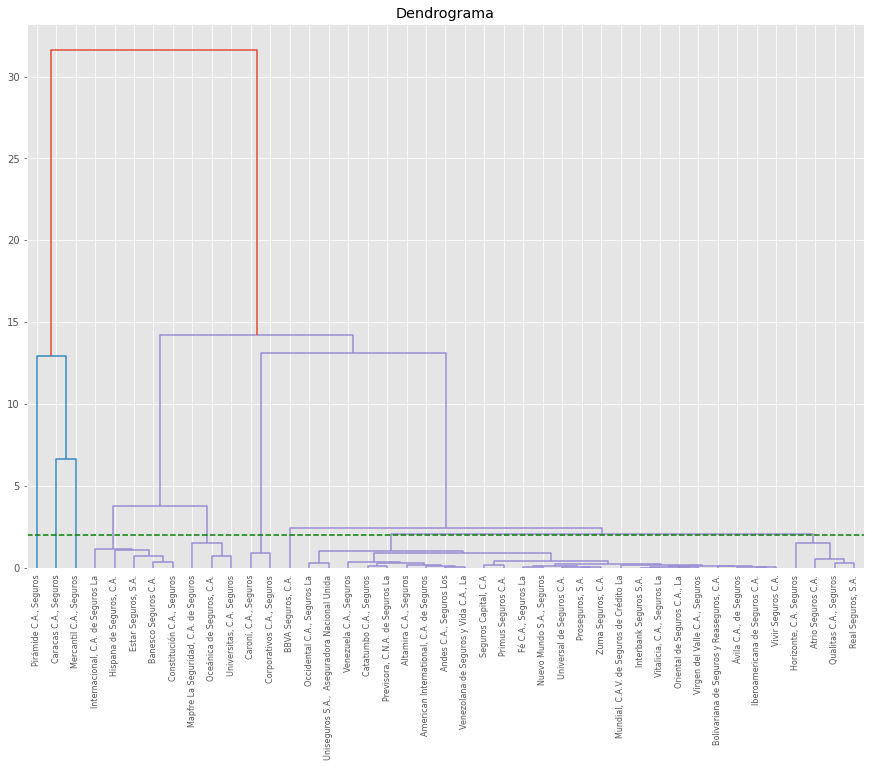

In [34]:
plt.figure(figsize=(15,10))
plt.title("Dendrograma")
z = sch.linkage(data_3_cluster, method = "ward")
dend = sch.dendrogram(z, labels = df.index.tolist())
plt.axhline(y=2,color="g", linestyle ="--")
plt.show()